In [1]:
import pandas as pd

In [16]:
df = pd.read_csv('data\original\Online Harassment Dataset\onlineHarassmentDataset.tdf', delimiter='\t', encoding='latin-1', usecols=['Tweet', 'Code'])
df.to_csv('data\original\onlineHarassmentDataset.csv', index=False, encoding='latin-1')


In [1]:
with open('data\original\Online Harassment Dataset\onlineHarassmentDataset.tdf') as f:
    print(f)

<_io.TextIOWrapper name='data\\original\\Online Harassment Dataset\\onlineHarassmentDataset.tdf' mode='r' encoding='cp1252'>


In [17]:
df1 = pd.read_csv('data\original\onlineHarassmentDataset.csv', encoding='latin-1')

In [44]:
import re
text = 'RT rt rt RT adfs RT'
text = re.sub(r'(?<=\s)rt(?=\s)|\Art(?=\s)|(?<=\s)rt\Z', r' ', text, flags=re.IGNORECASE)
from src.utils.cleaning import remove_excess_spaces, remove_space_at_beginning_or_end

text = remove_excess_spaces(text)
text = remove_space_at_beginning_or_end(text)
text



'adfs'

In [2]:
import pandas as pd

df = pd.read_csv('C:\\Users\\rooty\\UWEC\\Research\\CyberBullyingML\\venv\\cyberbullying-ml\\data\\original\\hatespeech_tweets.csv')


In [100]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [1]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

p_dist = {'n_estimators': [5,6,7,8,9,10,11]}

xgb = XGBClassifier(objective='binary:logistic')
rs = RandomizedSearchCV(xgb, p_dist, scoring='f1_macro')


In [50]:
df = pd.DataFrame(rs.cv_results_)
df.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.144081,0.004423,0.014536,0.000877,5,{'n_estimators': 5},0.636493,0.626769,0.629368,0.665696,0.653064,0.642278,0.014869,2
1,0.168214,0.007347,0.013754,0.000516,6,{'n_estimators': 6},0.634093,0.633559,0.656221,0.642646,0.634847,0.640273,0.008633,4
2,0.195568,0.007812,0.014488,0.002600,7,{'n_estimators': 7},0.640432,0.632866,0.656116,0.655816,0.636613,0.644369,0.009767,1
3,0.206515,0.003717,0.013964,0.001463,8,{'n_estimators': 8},0.642786,0.631622,0.610807,0.632619,0.578145,0.619196,0.023007,6
4,0.224590,0.006748,0.014793,0.001043,9,{'n_estimators': 9},0.631886,0.638863,0.615269,0.605125,0.583905,0.615010,0.019591,7


In [4]:
class IntermediateVectorizer(CountVectorizer):
    def __init__(self):
        print("Entered init of ITV")
        self.eval_set = None
        super().__init__()
    def fit(self, x, y=None, eval_set=None):
        print("Entered fit of ITV")
        return self
    def transform(self, x, x_val=None):
        return x
    def fit_transform(self, x, y=None, eval_set=None):
        x = super().fit_transform(x, y)
        self.eval_set = (super().transform(eval_set[0]), eval_set[1])
        return x, self.eval_set


In [49]:
# def patch_params(params):
#     # Updates a configuration of possible parameters
#     return params

# def monkey_getitem__(self, ind):
#     """Get the parameters that would be ``ind``th in iteration
#     Parameters
#     ----------
#     ind : int
#         The iteration index
#     Returns
#     -------
#     params : dict of string to any
#         Equal to list(self)[ind]
#     """
#     # This is used to make discrete sampling without replacement memory
#     # efficient.
#     for sub_grid in self.param_grid:
#         # XXX: could memoize information used here
#         if not sub_grid:
#             if ind == 0:
#                 return {}
#             else:
#                 ind -= 1
#                 continue

#         # Reverse so most frequent cycling parameter comes first
#         keys, values_lists = zip(*sorted(sub_grid.items())[::-1])
#         sizes = [len(v_list) for v_list in values_lists]
#         total = np.product(sizes)

#         if ind >= total:
#             # Try the next grid
#             ind -= total
#         else:
#             out = {}
#             for key, v_list, n in zip(keys, values_lists, sizes):
#                 ind, offset = divmod(ind, n)
#                 out[key] = v_list[offset]
#             return patch_params(out) # patch params is the only addition to the source code

#     raise IndexError('ParameterGrid index out of range')

# from sklearn.model_selection import ParameterGrid, ParameterSampler

# ParameterSampler.__getitem__ = monkey_getitem__ 
# def monkey_run_search(self, evaluate_candidates):
#     """Search all candidates in param_grid"""
#     evaluate_candidates(ParameterSampler(self.param_distributions, self.n_iter))

# # replacing address of "_run_search " with "monkey_run_search"
# RandomizedSearchCV._run_search = monkey_run_search

In [251]:
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.stats import uniform


df = pd.read_csv('C:\\Users\\rooty\\UWEC\\Research\\CyberBullyingML\\venv\\cyberbullying-ml\\data\\en_only\\hatespeech_tweets_basic_clean.csv')
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df['class'] = df['class'].apply(lambda x : 1 if x == 0 else 0)
x_train, x_val, y_train, y_val = train_test_split(df['tweet'], df['class'], test_size=.2)

# Define the pipeline
pipeline = Pipeline([
    # ('eval_vectorizer', IntermediateVectorizer()),
    ('vectorizer', 'passthrough'),
    ('classifier', XGBClassifier(objective='binary:logistic'))
])

# Define the parameter distribution
param_dist = {
    'vectorizer': [CountVectorizer(), TfidfVectorizer()],
    'vectorizer__max_features': [1, 1, 8000,7000],
    'classifier__n_estimators': [50, 100, 200, 300, 400],
    'classifier__max_depth': [3, 4, 5, 6, 7],
    'classifier__subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=5,
    cv=2,
    scoring='accuracy',
)

# Fit the random search
random_search.fit(
    x_train,
    y_train,
    # eval_vectorizer__eval_set=(x_val, y_val),
    # classifier__early_stopping_rounds=10,
    # classifier__eval_metric='logloss',
    # classifier__eval_set=[(it.x_val, y_val)]
)

# Create a dataframe of the results
results_df = pd.DataFrame(random_search.cv_results_)
results_df = results_df.sort_values('rank_test_score')

In [252]:
pd.DataFrame(random_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_vectorizer__max_features,param_vectorizer,param_classifier__subsample,param_classifier__n_estimators,param_classifier__max_depth,param_classifier__colsample_bytree,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.819074,0.030289,0.116796,0.003647,8000,CountVectorizer(),0.6,300,7,1.0,"{'vectorizer__max_features': 8000, 'vectorizer...",0.940131,0.941242,0.940686,0.000555,5
1,0.164777,0.000295,0.099044,0.006041,1,TfidfVectorizer(),0.6,200,3,0.9,"{'vectorizer__max_features': 1, 'vectorizer': ...",0.945352,0.945240,0.945296,0.000056,1
2,1.567906,0.003922,0.125708,0.003769,7000,TfidfVectorizer(),0.6,400,4,1.0,"{'vectorizer__max_features': 7000, 'vectorizer...",0.942686,0.940909,0.941797,0.000889,4
3,0.128927,0.001200,0.092573,0.001413,1,TfidfVectorizer(),1.0,100,3,0.7,"{'vectorizer__max_features': 1, 'vectorizer': ...",0.945352,0.945240,0.945296,0.000056,1
4,1.219844,0.001370,0.113031,0.000092,7000,TfidfVectorizer(),0.8,400,3,0.7,"{'vectorizer__max_features': 7000, 'vectorizer...",0.943574,0.941575,0.942575,0.001000,3


C:\Users\rooty\AppData\Local\Temp\ipykernel_14936\1553889637.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='best', frameon=False)


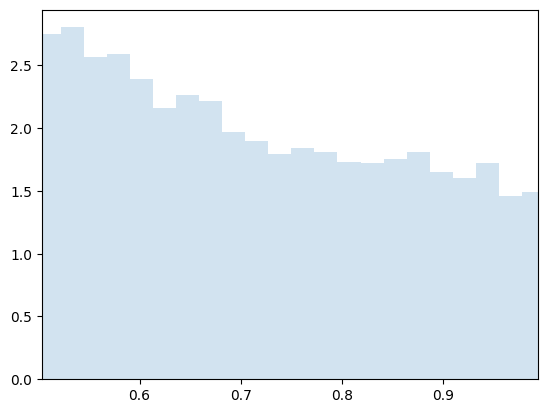

In [75]:
from scipy.stats import loguniform, uniform
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)
r = loguniform.rvs(size=10000, a=0.5, b=1)
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
x = np.linspace(loguniform.ppf(0.01,  a=0.5, b=1),
                loguniform.ppf(0.99,  a=0.5, b=1), 100)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

In [180]:
d = loguniform(0.1, 10)
d.rvs()

4.249042751927324

In [236]:
from scipy.stats import halfcauchy
d = halfcauchy()
d.rvs()

2.733972405506748

In [17]:
a['b'] = 2
a

{'a': 1, 'b': 2}

In [18]:
m

{'a': 1}

In [13]:
pipeline.set_params()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [34]:
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__colsample_bytree,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.485464,0.126845,0.003240,0.000322,0.9,0.029732,5,300,0.9,"{'classifier__colsample_bytree': 0.9, 'classif...",NaN,NaN,NaN,NaN,NaN,1
1,1.405065,0.030690,0.176518,0.031238,0.6,0.005938,7,100,0.6,"{'classifier__colsample_bytree': 0.6, 'classif...",NaN,NaN,NaN,NaN,NaN,1


In [175]:
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=2,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    random_state=RANDOM_SEED,
    verbose=1
)

random_search.get_params()

{'cv': 3,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('vectorizer', CountVectorizer()),
  ('eval_vectorizer', <__main__.IntermediateVectorizer at 0x17bf03a04f0>),
  ('classifier',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, device=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, feature_types=None,
                 gamma=None, grow_policy=None, importance_type=None,
                 interaction_constraints=None, learning_rate=None, max_bin=None,
                 max_cat_threshold=None, max_cat_to_onehot=None,
                 max_delta_step=None, max_depth=None, max_leaves=None,
                 min_child_weight=None, missing=nan, monotone_constraints=None,
                 multi_strategy=None, n_estimators=None, n_jobs=None,
                 num_parallel_tree=None, random_state=None, ...))]

In [15]:
df.sort_values(by='mean_test_score', inplace=True, ascending=False)
top5 = df.head(5)

In [18]:
top5[['params', 'mean_test_score', 'std_test_score']]

NameError: name 'btop5' is not defined

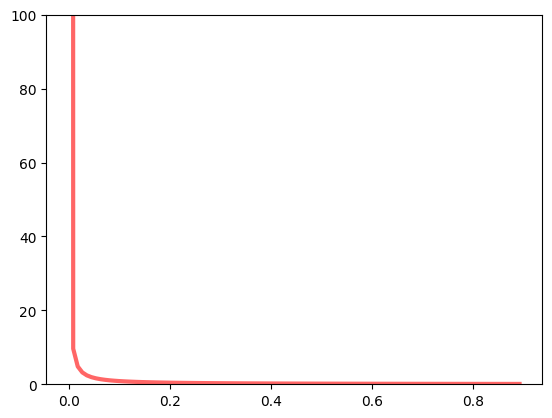

In [35]:
a, b = 1e-5, 1

fig, ax = plt.subplots(1, 1)
x = np.linspace(loguniform.ppf(0.01, a, b),
                loguniform.ppf(0.99, a, b), 100)
ax.plot(x, loguniform.pdf(x, a, b),
       'r-', lw=3, alpha=0.6, label='loguniform pdf')
ax.set_ylim(top=100, bottom=0)  # Set the maximum y-axis value to 100
plt.show()

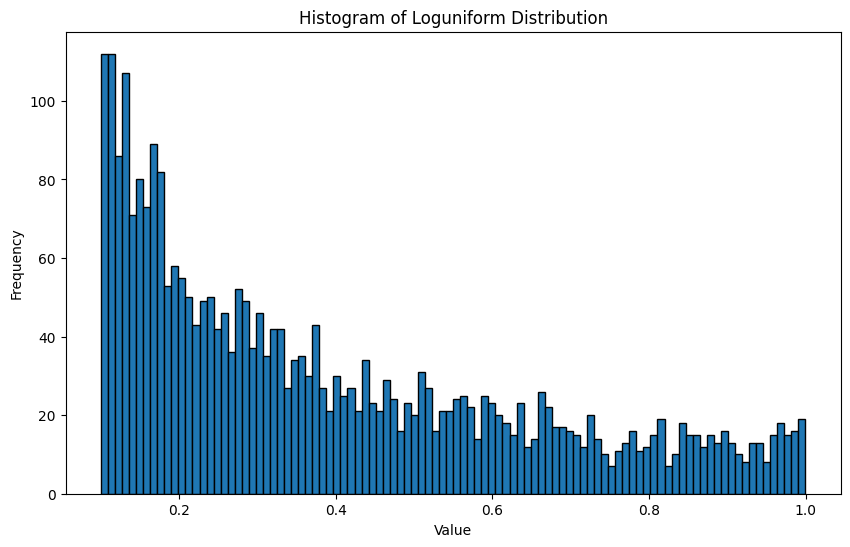

In [85]:
vals = [loguniform.rvs(0.1,1) for _ in range(3000)]
# Create a histogram of the vals
plt.figure(figsize=(10, 6))
plt.hist(vals, bins=100, edgecolor='black')
plt.title('Histogram of Loguniform Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


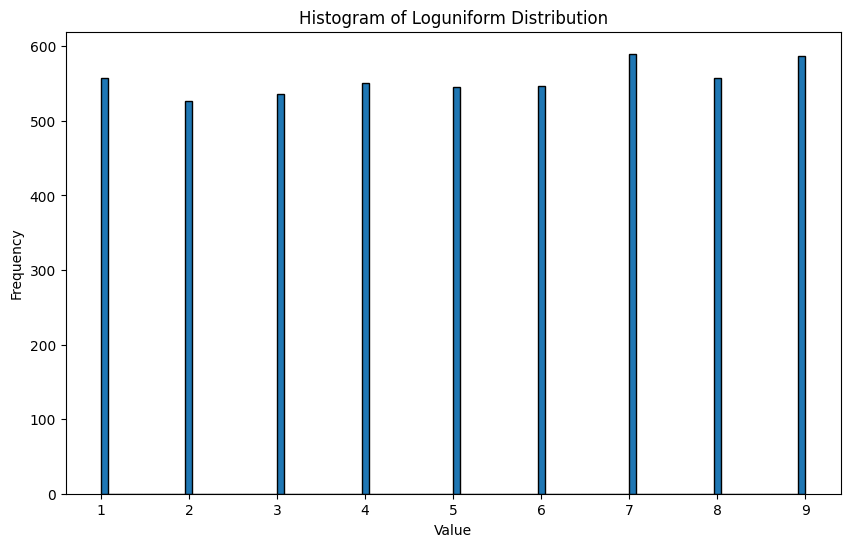

In [288]:
from scipy.stats import randint
d = randint(1, 10)
vals = [d.rvs() for _ in range(5000)]
# Create a histogram of the vals
plt.figure(figsize=(10, 6))
plt.hist(vals, bins=100, edgecolor='black')
plt.title('Histogram of Loguniform Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [480]:
from scipy.stats import randint, uniform, loguniform
from nltk.stem import WordNetLemmatizer, SnowballStemmer, PorterStemmer, LancasterStemmer
import nltk
import random

RUN = 'exp3_hyp_search'
TRAIN_DATA_NAME = '48000_cyberbullying_tweets_basic_clean.csv' 
TEST_DATA_NAME = 'hatespeech_tweets_basic_clean.csv'
RANDOM_SEED = 115
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer('english')
porter = PorterStemmer()
lancaster = LancasterStemmer()

def pp_WordNetLemmatizer(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

def pp_SnowballStemmer(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

def pp_PorterStemmer(text):
    return ' '.join([porter.stem(word) for word in text.split()])

def pp_LancasterStemmer(text):
    return ' '.join([lancaster.stem(word) for word in text.split()])


pp = lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
pp1 = lambda x: ' '.join([stemmer.stem(word) for word in x.split()])
pp2 = lambda x: ' '.join([porter.stem(word) for word in x.split()])
pp3 = lambda x: ' '.join([lancaster.stem(word) for word in x.split()])

default_catboost_param_dists = {
    'vectorizer': [CountVectorizer(), TfidfVectorizer()],
    'vectorizer__ngram_range': [(1,1), (1,2), (1,3)],
    'vectorizer__analyzer': ['word', 'word', 'word', 'word', 'word', 'char', 'char_wb'],
    'vectorizer__max_df': uniform(0.29, 0.7),
    'vectorizer__preprocessor': [None, pp_WordNetLemmatizer, pp_SnowballStemmer, pp_PorterStemmer, pp_LancasterStemmer],
    'vectorizer__min_df': [1, 1, 2, 3],
    'classifier__depth': randint(3, 10),
    'classifier__learning_rate': uniform(0.01, 0.3),
    'classifier__n_estimators': randint(50, 1000),
    'classifier__min_data_in_leaf': randint(1, 20),
    'classifier__grow_policy': ['SymmetricTree'],
    'classifier__score_function': ['L2', 'Cosine'],
    'classifier__colsample_bylevel': uniform(0.5, 0.5),
    'classifier__l2_leaf_reg': uniform(0, 6),
    'classifier__random_state': randint(1, 10000)
}

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rooty\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [366]:
from pathlib import Path

path_to_data = Path('C:\\Users\\rooty\\UWEC\\Research\\CyberBullyingML\\venv\\cyberbullying-ml\\data\\en_only')
train_df = pd.read_csv(path_to_data / TRAIN_DATA_NAME)
test_df = pd.read_csv(path_to_data / TEST_DATA_NAME)
train_df.dropna(inplace=True)
train_df.drop_duplicates(inplace=True)
train_df.reset_index(drop=True, inplace=True)
test_df.dropna(inplace=True)
test_df.drop_duplicates(inplace=True)
test_df.reset_index(drop=True, inplace=True)
test_df.rename(columns={'class': 'label'}, inplace=True)


In [474]:
def get_OOV_feats(train_data:pd.Series, test_data:pd.Series, print_oov_feats:bool=False):
    v1 = CountVectorizer()
    v2 = CountVectorizer()

    v1.fit(train_data)
    v2.fit(test_data)

    feats_train = v1.get_feature_names_out()
    feats_test = v2.get_feature_names_out()

    oov_feats = np.setdiff1d(feats_test, feats_train)
    if print_oov_feats: print(f"OOV features: {oov_feats}")

    return oov_feats

def balance_train_and_test(notcb_train:pd.DataFrame, cb_train:pd.DataFrame, notcb_test:pd.DataFrame, cb_test:pd.DataFrame, random_state:int):
    """
    This functions does not relabel the data that is moved!
    """
    x1 = notcb_train.shape[0]
    x2 = cb_train.shape[0]
    y1 = notcb_test.shape[0]
    y2 = cb_test.shape[0]

    x_hat = (y2 * x1 - x2 * y1) / (y2 + x2)

    
    if x_hat < 0: # take from the test and add to training
        np.testing.assert_allclose(ratio:=(y1 + x_hat)/(y2), (x1 - x_hat)/(x2), atol=1e-5)
        notcb_test = notcb_test.sample(frac=1, random_state=random_state)
        x_hat *= -1 
        data_to_move = notcb_test[:int(x_hat)]
        notcb_test = notcb_test[int(x_hat):]
        train_df = pd.concat([notcb_train, cb_train, data_to_move])
        test_df = pd.concat([notcb_test, cb_test])

    else: # take from training, add to test
        np.testing.assert_allclose(ratio:=(y1 + x_hat)/(y2), (x1 - x_hat)/(x2), atol=1e-5)
        notcb_train = notcb_train.sample(frac=1, random_state=random_state)
        data_to_move = notcb_train[:int(x_hat)]
        notcb_train = notcb_train[int(x_hat):]
        train_df = pd.concat([notcb_train, cb_train])
        test_df = pd.concat([notcb_test, cb_test, data_to_move])
    
    return train_df, test_df, x_hat, ratio # the new ratio of noncb to cb (in both sets)

def get_top_5_results(random_search: RandomizedSearchCV):
    results = pd.DataFrame(random_search.cv_results_) 
    results.sort_values(by='mean_test_score', inplace=True, ascending=False)
    top_5 = results.head(5)
    return top_5[['params', 'mean_test_score', 'std_test_score']]

In [367]:
train_df['label'].value_counts()

label
religion     7942
age          7910
gender       7396
ethnicity    7319
other        6731
notcb        6377
Name: count, dtype: int64

In [368]:
train_df['label'] = train_df['label'].apply(lambda x: 0 if x == 'notcb' else 1)
test_df['label'] = test_df['label'].map({0: 1, 1: 0, 2: 0})
# Balance the datasets
notcb_train = train_df[train_df['label'] == 0]
cb_train = train_df[train_df['label'] == 1]
notcb_test = test_df[test_df['label'] == 0]
cb_test = test_df[test_df['label'] == 1]
print(notcb_train.shape)
print(cb_train.shape)
print(notcb_test.shape)
print(cb_test.shape)

balanced_train, balanced_test, x_hat, ratio = balance_train_and_test(notcb_train, cb_train, notcb_test, cb_test, random_state=RANDOM_SEED)

(6377, 2)
(37298, 2)
(21262, 7)
(1246, 7)


In [370]:
x_hat

20368.522571606474

In [369]:
ratio

0.7170765877957671

In [487]:
param_dist = default_catboost_param_dists.copy() 
param_dist['classifier__class_weights'] = [[1,1], [1,1], [1, ratio]]


In [488]:
from catboost import CatBoostClassifier
pipeline = Pipeline([
    ('vectorizer', 'passthrough'),
    ('classifier', CatBoostClassifier(verbose=False))
])

In [489]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=RANDOM_SEED)
rs2_cat = RandomizedSearchCV(
    pipeline, param_distributions=param_dist, n_iter=5, cv=skf, 
    scoring='f1_macro', n_jobs=10, random_state=RANDOM_SEED,
)

In [490]:
balanced_train = balanced_train.sample(frac=1,random_state=1)

In [491]:
x = balanced_train['tweet'].iloc[:1000]
y = balanced_train['label'].iloc[:1000]

In [512]:
rs2_cat.fit(x,y)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=2, random_state=115, shuffle=True),
                   estimator=Pipeline(steps=[('vectorizer', 'passthrough'),
                                             ('classifier',
                                              <catboost.core.CatBoostClassifier object at 0x000002E1623860B0>)]),
                   n_iter=5, n_jobs=10,
                   param_distributions={'classifier__class_weights': [[1, 1],
                                                                      [1, 1],
                                                                      [1,
                                                                       0.7170765877957671]],
                                        'classifier__colsample_bylevel':...
                                        'vectorizer__max_df': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002E13CD69330>,
                                        'vectorizer__min_df': [1, 1, 2, 3],
                                        'vectorizer__ngram_range': [(1, 1),
                                                                    (1, 2),
                                                                    (1, 3)],
                                        'vectorizer__preprocessor': [None,
                                                                     <function pp_WordNetLemmatizer at 0x000002E162241A20>,
                                                                     <function pp_SnowballStemmer at 0x000002E1587FAE60>,
                                                                     <function pp_PorterStemmer at 0x000002E1469F7880>,
                                                                     <function pp_LancasterStemmer at 0x000002E1469F72E0>]},
                   random_state=115, scoring='f1_macro')

In [513]:
top_10_og = get_top_5_results(rs2_cat)

In [514]:
top_10 = top_10_og.copy(deep=True)
top_10

,params,mean_test_score,std_test_score
3,"{'classifier__class_weights': [1, 1], 'classif...",0.817164,0.012362
4,"{'classifier__class_weights': [1, 1], 'classif...",0.807798,0.018072
0,"{'classifier__class_weights': [1, 0.7170765877...",0.800787,0.019191
1,"{'classifier__class_weights': [1, 0.7170765877...",0.793203,0.002562
2,"{'classifier__class_weights': [1, 1], 'classif...",0.788837,0.014654


In [519]:
mydict = {'a': [1]}
ab = mydict.copy()
ab['a'] = 1
mydict

{'a': [1]}

AttributeError: 'int' object has no attribute 'append'

In [461]:
def myF(x):
    return x
result = []
top_10 = get_top_5_results(rs2_cat)
for d in top_10['params']:
    d['vectorizer'] = CountVectorizer(preprocessor=myF)
    result.append(d)

top_10['params'] = result


In [413]:
for d in top_10['params']:
    for key, value in d.items():
        if callable(value):
            print(f"Function found in key: {key}")


Function found in key: vectorizer__preprocessor
Function found in key: vectorizer__preprocessor
Function found in key: vectorizer__preprocessor
Function found in key: vectorizer__preprocessor
Function found in key: vectorizer__preprocessor
Function found in key: vectorizer__preprocessor
Function found in key: vectorizer__preprocessor
Function found in key: vectorizer__preprocessor


In [454]:
def funct(x):
    pass

if hasattr(funct, '__call__'):
    print(funct.__name__)

funct


In [433]:


for d in top_10['params']:
    print('Start')
    for k, v in d.items():
        if callable(v):
            print(v.__name__)
    print('END\n\n')

Start
pp_WordNetLemmatizer
END


Start
pp_WordNetLemmatizer
END


Start
END


Start
pp_WordNetLemmatizer
END


Start
pp_WordNetLemmatizer
END


Start
pp_WordNetLemmatizer
END


Start
pp_WordNetLemmatizer
END


Start
pp_WordNetLemmatizer
END


Start
END


Start
pp_WordNetLemmatizer
END




In [523]:
import json
import types

from torch import NoneType

def blah():
    pass

with open('log/blah.json', 'w+') as j:
    top_10_params = list(top_10['params'])
    for d in top_10_params:
        d['vectorizer'] = d['vectorizer'].__class__.__name__
        if not isinstance(d['vectorizer__preprocessor'], (type(None))):
            print(d['vectorizer__preprocessor'])
            d['vectorizer__preprocessor'] = d['vectorizer__preprocessor'].__name__ 
        else: 
            d['vectorizer__preprocessor'] = None
   

    top_10['params'] = top_10_params
    json.dump(top_10.to_dict(), j)

<function pp_SnowballStemmer at 0x000002E1587FAE60>
<function pp_WordNetLemmatizer at 0x000002E162241A20>
<function pp_WordNetLemmatizer at 0x000002E162241A20>


In [502]:
top_10['params']

3    {'classifier__class_weights': [1, 1], 'classif...
4    {'classifier__class_weights': [1, 1], 'classif...
0    {'classifier__class_weights': [1, 0.7170765877...
1    {'classifier__class_weights': [1, 0.7170765877...
2    {'classifier__class_weights': [1, 1], 'classif...
Name: params, dtype: object

In [522]:
for d in top_10['params']:
    for k, v in d.items():
        print(k, v)

classifier__class_weights [1, 1]
classifier__colsample_bylevel 0.7379509230989536
classifier__depth 4
classifier__grow_policy SymmetricTree
classifier__l2_leaf_reg 1.6315210896001078
classifier__learning_rate 0.18332967992688518
classifier__min_data_in_leaf 6
classifier__n_estimators 437
classifier__random_state 5418
classifier__score_function Cosine
vectorizer CountVectorizer()
vectorizer__analyzer word
vectorizer__max_df 0.6133306939444634
vectorizer__min_df 3
vectorizer__ngram_range (1, 3)
vectorizer__preprocessor <function pp_SnowballStemmer at 0x000002E1587FAE60>
classifier__class_weights [1, 1]
classifier__colsample_bylevel 0.852242727544562
classifier__depth 7
classifier__grow_policy SymmetricTree
classifier__l2_leaf_reg 4.669908959486414
classifier__learning_rate 0.29031718437600956
classifier__min_data_in_leaf 5
classifier__n_estimators 861
classifier__random_state 4488
classifier__score_function Cosine
vectorizer CountVectorizer()
vectorizer__analyzer word
vectorizer__max_df 

In [8]:
from scipy.stats import uniform

d = uniform(0.5, 0.5)

In [13]:
d.rvs()

1.3334787706399

In [14]:
import logging
import logging.handlers
import sys

logging.basicConfig(
    filename=f'log/test.log',
    filemode='w+',
    encoding='utf-8',
    format='{asctime} - {levelname} - {message}',
    level=logging.DEBUG,
    style='{',
    datefmt='%Y-%m-%d %H:%M'
)

In [19]:
log = logging.getLogger()

In [21]:
print('test')